# RBC
Red Blood Cells

Since RBC are not cancer, we wish to exclude them from cancer classification.
As a compromise, we wish to exclude patches overrun with RBC.
This analysis shows that most patches have no RBC but a few patches have lots of RBC.

In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
DIRECTORY = '/home/jrm/Adjeroh/Naved/Process100.all/'
# The "Merge RBC" data gives a rough RBC count after cell bounaries were de-spiked and merged.
FILE = 'Process100_MergeRBC.csv'

In [3]:
object_df = pd.read_csv(DIRECTORY+FILE)
for col in object_df.columns:
    print(col)

ImageNumber
ObjectNumber
AreaShape_Area
AreaShape_BoundingBoxArea
AreaShape_BoundingBoxMaximum_X
AreaShape_BoundingBoxMaximum_Y
AreaShape_BoundingBoxMinimum_X
AreaShape_BoundingBoxMinimum_Y
AreaShape_Center_X
AreaShape_Center_Y
AreaShape_CentralMoment_0_0
AreaShape_CentralMoment_0_1
AreaShape_CentralMoment_0_2
AreaShape_CentralMoment_0_3
AreaShape_CentralMoment_1_0
AreaShape_CentralMoment_1_1
AreaShape_CentralMoment_1_2
AreaShape_CentralMoment_1_3
AreaShape_CentralMoment_2_0
AreaShape_CentralMoment_2_1
AreaShape_CentralMoment_2_2
AreaShape_CentralMoment_2_3
AreaShape_Compactness
AreaShape_ConvexArea
AreaShape_Eccentricity
AreaShape_EquivalentDiameter
AreaShape_EulerNumber
AreaShape_Extent
AreaShape_FormFactor
AreaShape_HuMoment_0
AreaShape_HuMoment_1
AreaShape_HuMoment_2
AreaShape_HuMoment_3
AreaShape_HuMoment_4
AreaShape_HuMoment_5
AreaShape_HuMoment_6
AreaShape_InertiaTensorEigenvalues_0
AreaShape_InertiaTensorEigenvalues_1
AreaShape_InertiaTensor_0_0
AreaShape_InertiaTensor_0_1
Area

In [4]:
DECILES=[x/10 for x in range(5,10,1)]
patch_df=object_df.groupby(['ImageNumber']).sum()
patch_df.describe(percentiles=DECILES)
#object_number_df=patch_df.describe()
#pd.DataFrame.hist(patch_df,column='count')

,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_CentralMoment_0_0,...,Location_CenterMassIntensity_X_Eosin,Location_CenterMassIntensity_Y_Eosin,Location_CenterMassIntensity_Z_Eosin,Location_Center_X,Location_Center_Y,Location_MaxIntensity_X_Eosin,Location_MaxIntensity_Y_Eosin,Location_MaxIntensity_Z_Eosin,Number_Object_Number,Parent_ShrinkRBC
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.0,203.000000,203.000000,203.000000,203.000000,203.0,203.000000,203.000000
mean,6.211823,5645.492611,13189.871921,436.768473,434.857143,307.187192,304.300493,370.168102,368.543038,5645.492611,...,370.108754,368.541897,0.0,370.168102,368.543038,368.778325,366.512315,0.0,6.211823,15.793103
std,9.850338,9563.651253,22487.530252,382.608078,385.721305,285.838534,289.221785,329.700933,332.480611,9563.651253,...,329.644672,332.477668,0.0,329.700933,332.480611,327.799602,326.080433,0.0,9.850338,29.082616
min,1.000000,177.000000,240.000000,21.000000,33.000000,2.000000,1.000000,12.484375,18.561972,177.000000,...,12.504661,18.562353,0.0,12.484375,18.561972,15.000000,10.000000,0.0,1.000000,1.000000
50%,3.000000,1228.000000,2470.000000,285.000000,285.000000,223.000000,211.000000,244.381919,253.621341,1228.000000,...,244.424794,253.743665,0.0,244.381919,253.621341,244.000000,255.000000,0.0,3.000000,3.000000
60%,3.000000,2102.000000,4167.200000,325.000000,353.600000,270.400000,255.200000,292.999309,283.774105,2102.000000,...,291.553125,283.796283,0.0,292.999309,283.774105,291.200000,289.200000,0.0,3.000000,6.000000
70%,6.000000,3230.400000,7114.800000,551.000000,489.200000,386.600000,338.400000,458.312797,402.240701,3230.400000,...,458.333271,402.331863,0.0,458.312797,402.240701,453.600000,415.000000,0.0,6.000000,12.000000
80%,10.000000,8938.400000,25372.800000,741.400000,721.200000,497.800000,444.200000,578.528126,564.599932,8938.400000,...,578.495111,564.542982,0.0,578.528126,564.599932,579.600000,557.600000,0.0,10.000000,24.000000
90%,15.000000,18733.000000,46369.000000,1002.000000,997.400000,671.600000,699.000000,810.593891,852.240069,18733.000000,...,810.071620,852.593064,0.0,810.593891,852.240069,811.200000,860.200000,0.0,15.000000,43.800000
max,78.000000,49729.000000,95499.000000,2079.000000,2085.000000,1588.000000,1495.000000,1829.676381,1777.604707,49729.000000,...,1829.641190,1777.849494,0.0,1829.676381,1777.604707,1845.000000,1731.000000,0.0,78.000000,215.000000


array([[<AxesSubplot:title={'center':'ObjectNumber'}>]], dtype=object)

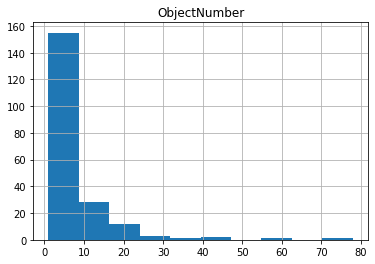

In [5]:
pd.DataFrame.hist(patch_df,column='ObjectNumber')

array([[<AxesSubplot:title={'center':'AreaShape_Area'}>]], dtype=object)

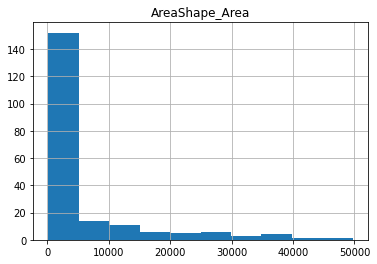

In [6]:
pd.DataFrame.hist(patch_df,column='AreaShape_Area')

## Analysis
CellProfiler did not generate output for the 400 patches with no RBC.
Of 600 patches processed, only 203 had RBCs.  

The analysis is the same whether we use RBC count or RBC area.
It seems RBC area is directly proportional to RBC count.

The most merged RBC in any patch was 12.
The elbow in the curve is at 2 RBC. 
90% of the 203 patches had 5 or fewer merged RBC.
I recommend excluding patches with more than 5 merged RBC. 

Not shown: we analyzed ShrinkRBC which reflects the counts before merging. 
The results were not much different. 
There is an elbow in the histogram at 10 or 20 RBC. 
Of 203 with RBC, 104 had under 10 RBC, and 104+20 had under 20 RBC. 
Of 203 with RBC, 90% had fewer than 23 RBC.  
The most RBC in any patch was 61 detected.  
I recommend excluding patches with 20 or more Shrink RBC.  